# Entregável 1 - visão computacional
### Gabriel Tkacz e Rafael Malcervelli

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.4.0 


## Funções úteis

In [22]:
def plot_hists(img, plt):
    """
        Plota o histograma de cada um dos canais RGB
        img - imagem RGB
        plt - objeto matplotlib
    """
    plt.figure(figsize=(20,10)); 
    img_h = img[:,:,0]
    img_s = img[:,:,1]
    img_v = img[:,:,2]
    histo_plot(img_h, "r","R", plt);
    histo_plot(img_s, "g","G", plt);
    histo_plot(img_v, "b","B", plt);

def make_hist(img_255, c, label, plt):
    """ img_255 - uma imagem com 3 canais de 0 até 255
        c a cor do plot
        label - o label do gráfico
        plt - matplotlib.pyplot
    """
    hist,bins = np.histogram(img_255.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    # plt.plot(cdf_normalized, color = c)
    plt.hist(img_255.flatten(),256,[0,256], color = c)
    plt.xlim([0,256])
    plt.legend(label, loc = 'upper left')
    plt.plot()

def histo_plot(img, cor, label, plt):
    """
        img - imagem
        cor - cor
        plt - matplotlib.pyplot object

    """
    plt.figure(figsize=(10,5))
    make_hist(img, cor, label, plt)
    plt.show()
    plt.figure(figsize=(10,5))
    plt.imshow(img, cmap="Greys_r")#, vmin=0, vmax=255)    
    plt.title(label)

# Equalização de histograma

In [23]:
rintin = cv2.imread("RinTinTin.jpg")

In [24]:
rintin.shape

(240, 320, 3)

In [25]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [26]:
rintin_gray.shape

(240, 320)

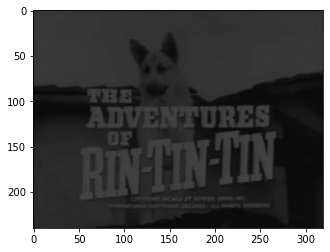

In [27]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

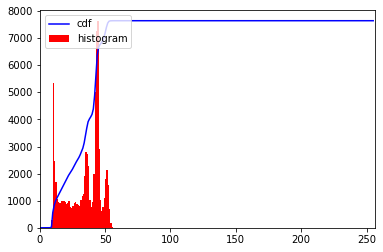

In [28]:
rintin_copy=rintin_gray.copy()
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

1. O histograma fornecido não aproveita bem as faixas de cores, pos ao invés de usar pixeis de 0 a 255, usa pixeis de cerca de 5 a 55.

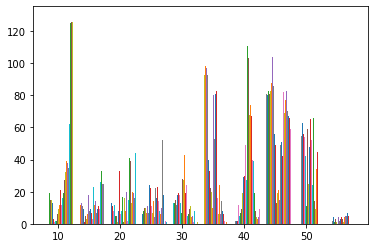

In [39]:
y, x, _ = plt.hist(rintin_gray)

mini=x.min()
maxi=x.max()

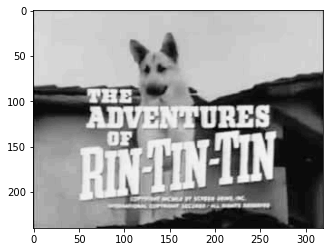

In [35]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        rintin_copy[i][j]=(255*((rintin_gray[i][j])-mini))/(maxi-mini)
        
plt.imshow(rintin_copy, cmap="Greys_r")

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


1. Sim, pois a caixa *vermelha* terá uma presença forte no canal vermelho e o creeper *azul* terá uma presença forte no canal azul, então ambos aparecerão brancos em seus respectivos canais, e bastante para a direita no histograma.

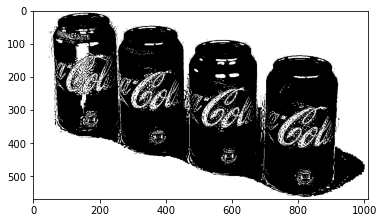

In [4]:
cena = cv2.imread("coke-cans.jpg")
#cena = cv2.imread("cena_canto_sala.jpg")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
#plot_hists(cena, plt)
cena_b = cena[:,:,0]

for i in range(cena_b.shape[0]):
    for j in range(cena_b.shape[1]):
        if cena_b[i][j]>=(250):
            cena_b[i][j]=255
            
for i in range(cena_b.shape[0]):
    for j in range(cena_b.shape[1]):
        if cena_b[i][j]!=255:
            cena_b[i][j]=0
            
plt.imshow(cena_b,cmap="Greys_r")

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [ ]:
at3=(cv2.imread("hall_box_battery_atividade3.png")).copy()
cinza_at3=cv2.cvtColor(at3, cv2.COLOR_BGR2GRAY)
cinza_og=cinza_at3.copy()

altura=cinza_at3.shape[0]
largura=cinza_at3.shape[1]

for i in range(altura):
    for j in range(largura):
        if j!=0 and j!=(largura-1):
            cinza_at3[i][j]=abs(int(cinza_og[i][j+1])-int(cinza_og[i][j-1]))
            
plt.imshow(cinza_at3,cmap="Greys_r")